# Detecting Purchasing Intent of Online Shoppers

### Context
TriGen is a clothing industry that aims to list its products on an e-commerce site to increase sales and visibility. The analytics team gathered the necessary data about the e-commerce site they wanted to list. The director of the TriGen demands to know about the conversion rate of the E-commerce platform. As a result, they take the perfect choice, when it comes to choosing an E-commerce site.


### Objective

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.


### Dataset

The data contains information on web sessions of a customer:

--------------------------------------
- **"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"**: These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

- Dataset has average bounce rates and exit rates for a page customer landed on.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- **TrafficType:** The "TrafficType" feature refers to web users who visit a website. Organic traffic, Direct traffic, Referal traffic, Email Marketing, Social Networks, Paid Media, Paid search.
1. Organic traffic: Organic traffic is the number of visitors who enter a website after doing a search on Google or other search engines and clicking one of the links on the results page.
2. Direct traffic: People who have directly typed the URL of your website into their search bar.
3. Referal traffic: This type of web traffic refers to people entering a website by clicking on a link from another site like a blog or a forum.
4. Email marketing: If you’re doing email marketing campaigns, you can measure their success by tracking how many visitors come to your site through your messages.
5. Social Networks: This traffic source refers to visitors who arrive after clicking on a social media post.
6. Paid media: This type of traffic refers to visitors who arrive after clicking on a pay-per-click ad on a social network. 
7. Paid search: This category would include users who come to your website after clicking on an ad from Google Ads or other PPC platforms.

--------------------------------------
- **Regions:** Alaska, Midwest, Northwest, North Central, Northeast, Pacific Islands, Southwest, South Central, and Southeast.
--------------------------------------
- **Browser:** A browser is software on your computer or mobile which you use to 'surf' the internet and visit webpages. Firefox,Chrome,Opera,MicrosoftEdge,Safari

- **VisitorType:** returning visitor, new visitor, or other types of customer. 
- **weekend:** a Boolean value indicating whether the date of the visit is weekend or not 
- **Month:** month of the year


#### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

#### Read the dataset

In [2]:
shoppers = pd.read_csv(r"detecting_purchasing_intent_online_shoppers.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data = shoppers.copy()

#### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,VisitorType,TrafficType,Region,Browser,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,Organic traffic,Alaska,Chrome,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,Feb,Returning_Visitor,Organic traffic,Alaska,Firefox,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,Organic traffic,Southeast,Chrome,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,Feb,Returning_Visitor,Direct traffic,Midwest,Firefox,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,Feb,Returning_Visitor,Direct traffic,Alaska,Firefox,True,False


In [5]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,VisitorType,TrafficType,Region,Browser,Weekend,Purchase
12073,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,0.0,Dec,Returning_Visitor,Organic traffic,Alaska,MicrosoftEdge,True,False
12074,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,Nov,Returning_Visitor,Referal traffic,Alaska,Firefox,True,False
12075,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.0,Nov,Returning_Visitor,Social Networks,Alaska,Firefox,True,False
12076,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,Nov,Returning_Visitor,Email Marketing,Northwest,Firefox,False,False
12077,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.0,Nov,New_Visitor,Organic traffic,Alaska,Firefox,True,False


#### Understand the shape of the dataset.

In [6]:
data.shape

(12078, 16)

* Dataset has 12078 rows and 16 columns

#### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12078 entries, 0 to 12077
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12078 non-null  int64  
 1   Administrative_Duration  12078 non-null  float64
 2   Informational            12078 non-null  int64  
 3   Informational_Duration   12078 non-null  float64
 4   ProductRelated           12078 non-null  int64  
 5   ProductRelated_Duration  12078 non-null  float64
 6   BounceRates              12078 non-null  float64
 7   ExitRates                12078 non-null  float64
 8   SpecialDay               12078 non-null  float64
 9   Month                    12078 non-null  object 
 10  VisitorType              12078 non-null  object 
 11  TrafficType              12078 non-null  object 
 12  Region                   12078 non-null  object 
 13  Browser                  12078 non-null  object 
 14  Weekend               

#### Insights:

- Most of the data-types are either **int64** or **float64**.
- 5 columns - Month,VisitorType,TrafficType,Region and Browser are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- The last two columns: "Weekend" and "Purchase", have the data-type as a **bool**.

#### Think about it:

- We already know that we convert the categorical data-types into suitable form using "OneHotEncoding".
- But here we have a **bool** data type. What should we do here?
- In Python, True and False are cast implicitly into integers:

    `True == 1`
    
    `False == 0`
    
    This means that an algorithm running in Python should work without conversion.

#### The below three functions need to be defined to carry out the Exploratory Data Analysis.

In [8]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [10]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations from EDA

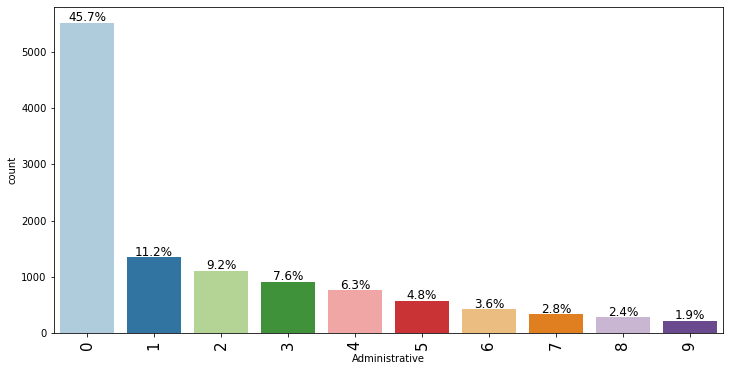

In [11]:
labeled_barplot(data, "Administrative", perc=True, n=10)

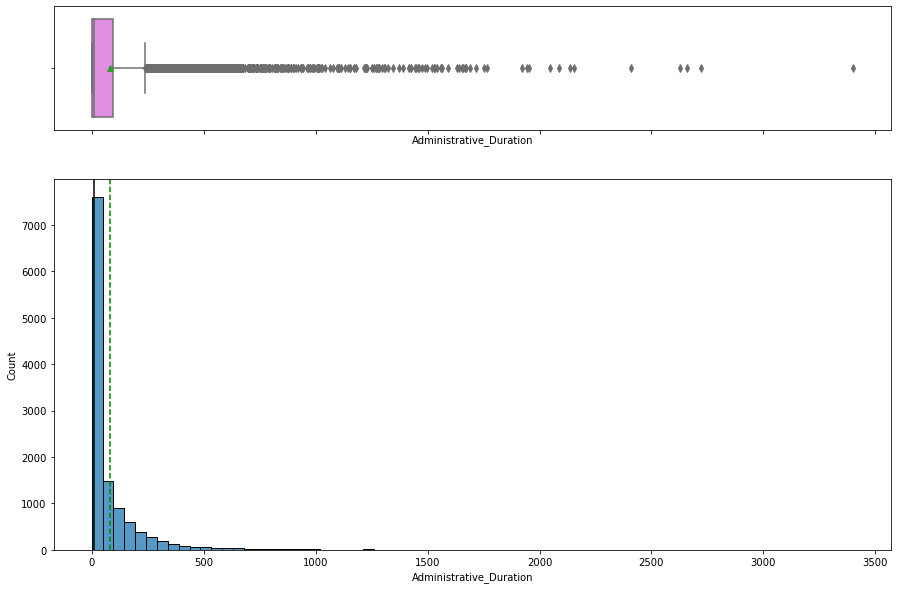

In [12]:
histogram_boxplot(data, "Administrative_Duration", bins=70)

In [13]:
data["Administrative_Duration"].describe()

count    12078.000000
mean        82.504841
std        178.224024
min          0.000000
25%          0.000000
50%         11.000000
75%         96.000000
max       3398.750000
Name: Administrative_Duration, dtype: float64

* `Administrative` and `Administrative_Duration`: 46.2% of the customers have not visited the administrative page. From the boxplot of Administrative_Duration we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

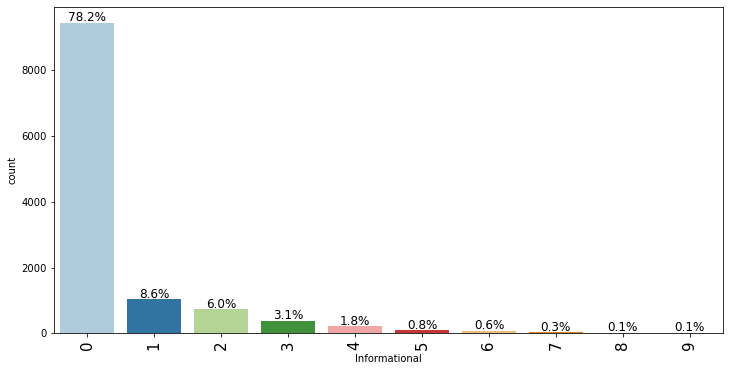

In [14]:
labeled_barplot(data, "Informational", perc=True, n=10)

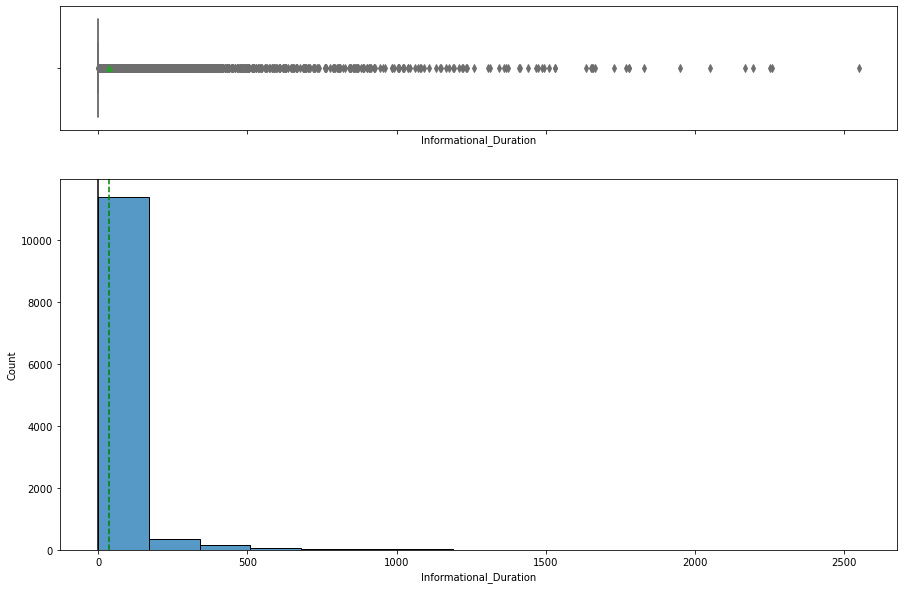

In [15]:
histogram_boxplot(data, "Informational_Duration")

In [16]:
data["Informational_Duration"].describe()

count    12078.000000
mean        35.191643
std        142.121130
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

* `Informational` and `Informational_Duration`: * 78.4% of the customers have not visited the Informational page. On average customers have spent 35 seconds on the informational page.


In [17]:
(data[data["ProductRelated"] == 0].shape[0] / data.shape[0]) * 100

0.30634210962079816

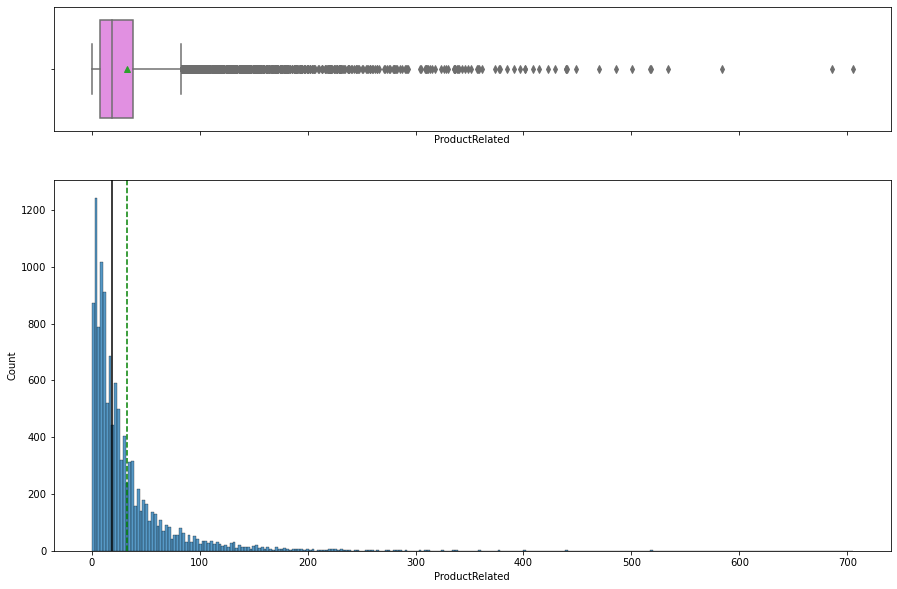

In [18]:
histogram_boxplot(data, "ProductRelated")

In [19]:
data["ProductRelated"].describe()

count    12078.000000
mean        32.371254
std         44.713689
min          0.000000
25%          8.000000
50%         19.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

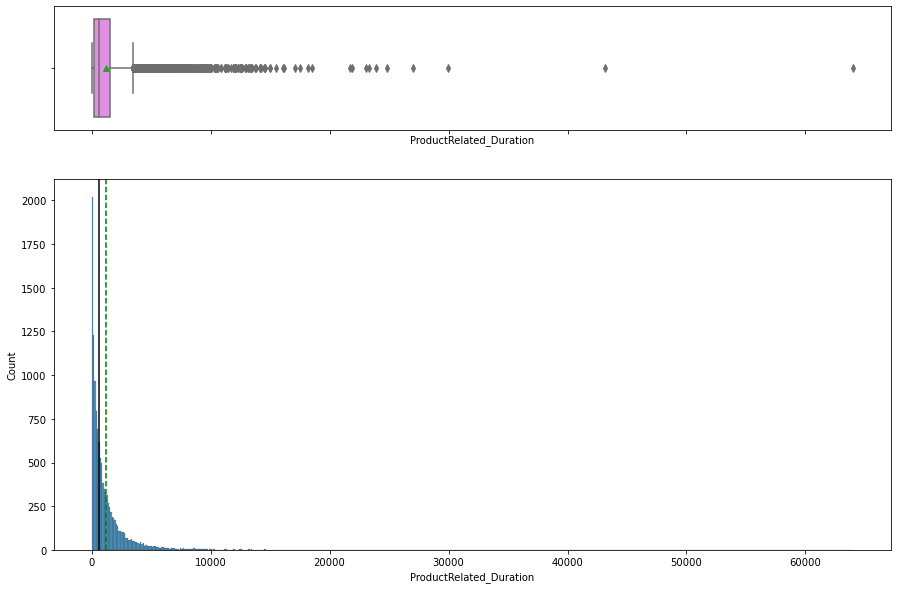

In [20]:
histogram_boxplot(data, "ProductRelated_Duration")

In [21]:
data["ProductRelated_Duration"].describe()

count    12078.000000
mean      1219.673861
std       1925.652731
min          0.000000
25%        202.270833
50%        623.845833
75%       1493.609890
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

* `ProductRelated`and `ProductRelated_Duration`: Only 0.3% of customers have not visited the product related pages. From the boxplot pf ProductRelated we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages. On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.


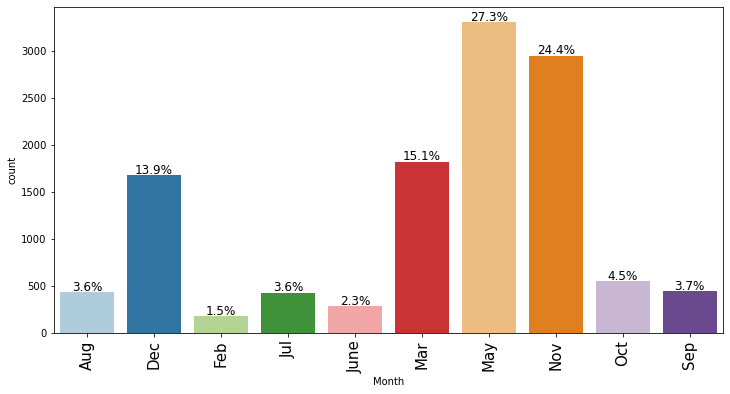

In [22]:
labeled_barplot(data, "Month", perc=True)

*  `Month`: 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic. November and May are the months with largest contributions in the purchase. There are lesser sessions in November as compared to May but more conversions.


Purchase  False  True    All
Month                       
All       10170  1908  12078
Nov        2189   760   2949
May        2937   365   3302
Dec        1467   216   1683
Mar        1630   192   1822
Oct         434   115    549
Sep         361    86    447
Aug         357    76    433
Jul         365    66    431
June        254    29    283
Feb         176     3    179
------------------------------------------------------------------------------------------------------------------------


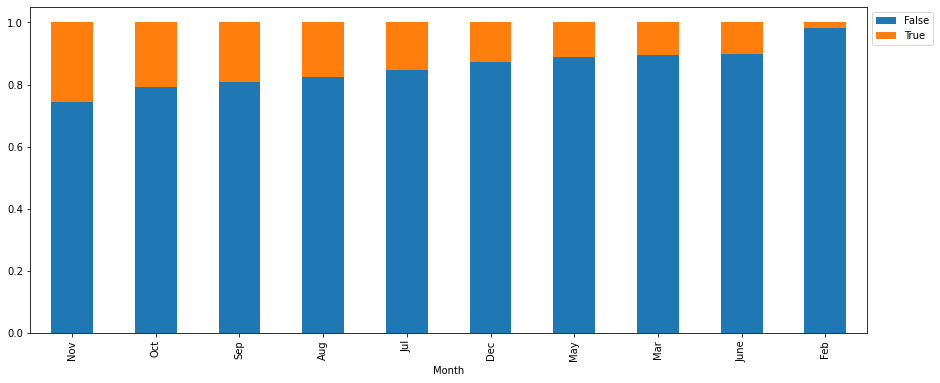

In [23]:
stacked_barplot(data, "Month", "Purchase")

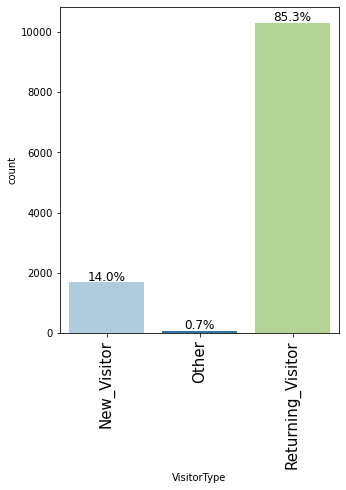

In [24]:
labeled_barplot(data, "VisitorType", perc=True)

* `VisitorType`: 85.5% of the customer are returning customers, indicating the website has a loyal base of customers. During these 10 months website also saw 13.9% of the customers visiting the website. Returning customers are the largest contributors to the purchase but interestingly New visitors end up having more conversion sessions.


Purchase           False  True    All
VisitorType                          
All                10170  1908  12078
Returning_Visitor   8837  1470  10307
New_Visitor         1268   422   1690
Other                 65    16     81
------------------------------------------------------------------------------------------------------------------------


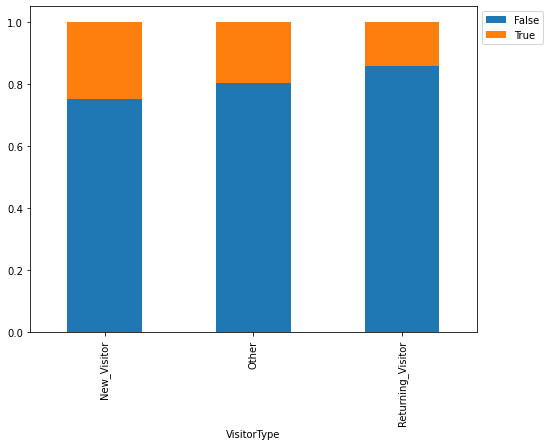

In [25]:
stacked_barplot(data, "VisitorType", "Purchase")

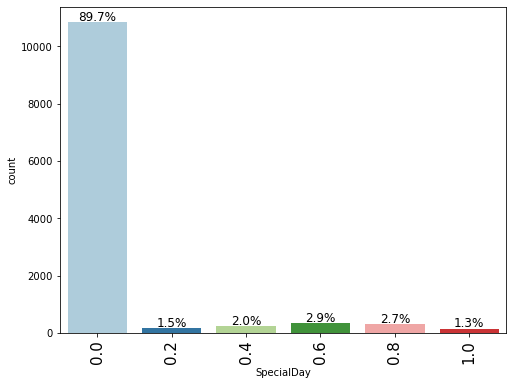

In [26]:
labeled_barplot(data, "SpecialDay", perc=True)

* `SpecialDay`: Regular days contribute more to the purchase instead of special occasions which is understandable as most days are non-special days, but there are very few conversion sessions on special days. Purchase sessions on or around Special day were only observed in May, this means website is not able to capitalize on the special occasions.

Purchase    False  True    All
SpecialDay                    
All         10170  1908  12078
0.0          9002  1831  10833
0.6           320    29    349
0.2           164    14    178
0.4           228    13    241
0.8           312    11    323
1.0           144    10    154
------------------------------------------------------------------------------------------------------------------------


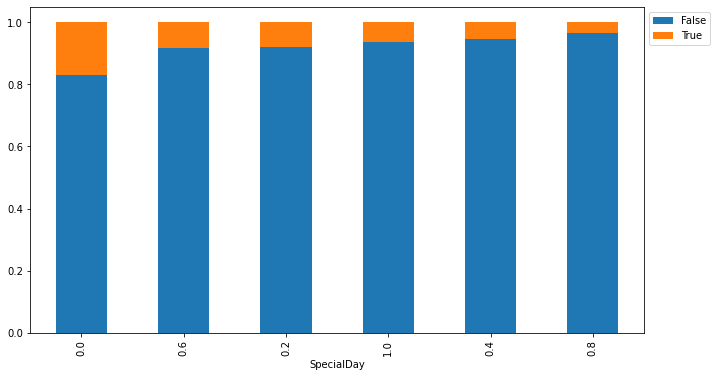

In [27]:
stacked_barplot(data, "SpecialDay", "Purchase")

In [28]:
purchase_data = data[data["Purchase"] == True]
purchase_data.groupby(["Month", "SpecialDay"])["Purchase"].count()

Month  SpecialDay
Aug    0.0            76
Dec    0.0           216
Feb    0.0             1
       0.8             1
       1.0             1
Jul    0.0            66
June   0.0            29
Mar    0.0           192
May    0.0           290
       0.2            14
       0.4            13
       0.6            29
       0.8            10
       1.0             9
Nov    0.0           760
Oct    0.0           115
Sep    0.0            86
Name: Purchase, dtype: int64

* `Purchase vs Different Pages`:
    * Customers who have visited Administrative, Informational and ProductRelated pages more times contribute to the purchase as compared to the one's who visited less pages.
    * Those customers who spend more time on the Administrative, Informational and ProductRelated pages help in generating the purchase.
    * There is clear distinction between the customers - visiting more pages and spending more time on pages contributes to the purchase.

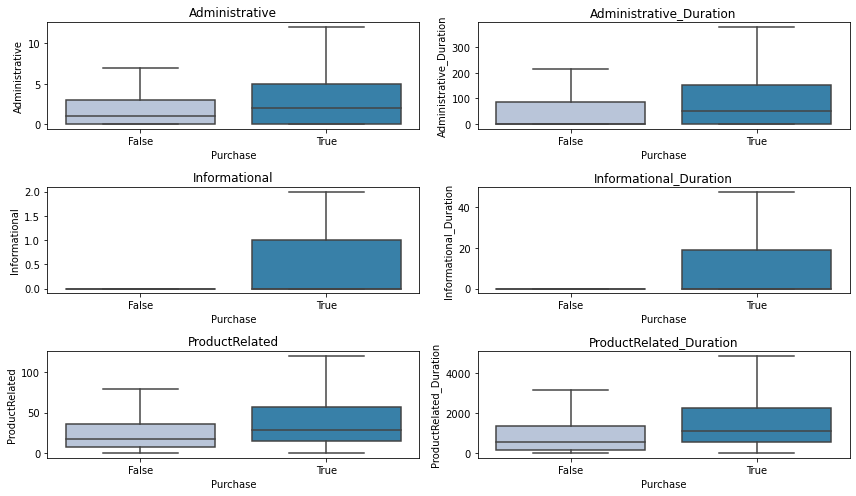

In [29]:
cols = data[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Purchase"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Customers leaving the website without triggering any response on server(definition of bounce rate) wouldn't be contributing to the purchase, which makes sense.

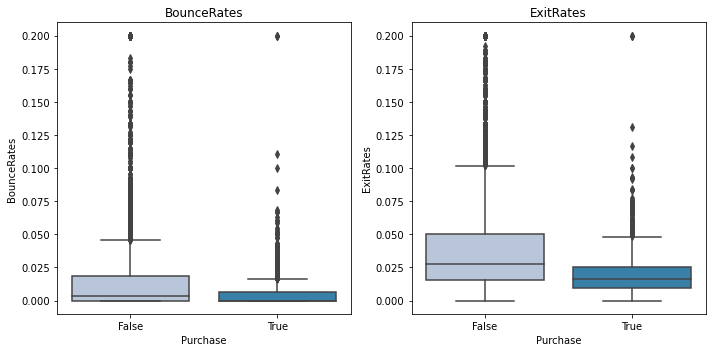

In [30]:
cols = data[['BounceRates','ExitRates']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Purchase"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


* Customer-Level Analysis
* New visitors who have visited more administrative pages and spent more time on them have not contributed to the purchase - This indicates that the administrative pages need to be user friendly and simplified.
* Returning customers visiting informational pages have contributed to purchase - The informational pages are doing well to provide customers with all the required information.
* ProductRelated pages are doing a fair job.
* November and December saw most new customers, but the proportion of new customers to returning customers is highest in October and September.

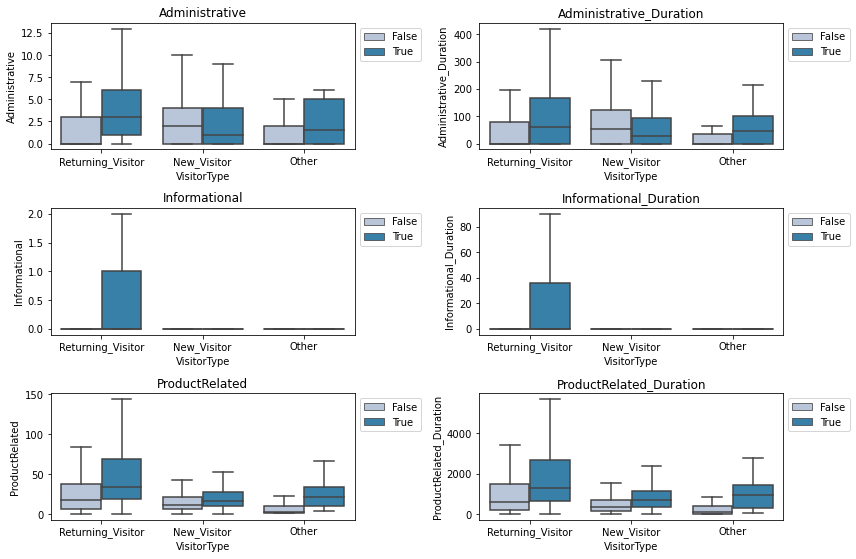

In [31]:
cols = data[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
    ]
].columns.tolist()
plt.figure(figsize=(12, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        data["VisitorType"],
        data[variable],
        hue=data["Purchase"],
        palette="PuBu",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

VisitorType  New_Visitor  Other  Returning_Visitor    All
Month                                                    
All                 1690     81              10307  12078
Dec                  333     58               1292   1683
Nov                  417     22               2510   2949
June                  30      1                252    283
Aug                   72      0                361    433
Feb                    1      0                178    179
Jul                   54      0                377    431
Mar                  232      0               1590   1822
May                  319      0               2983   3302
Oct                  124      0                425    549
Sep                  108      0                339    447
------------------------------------------------------------------------------------------------------------------------


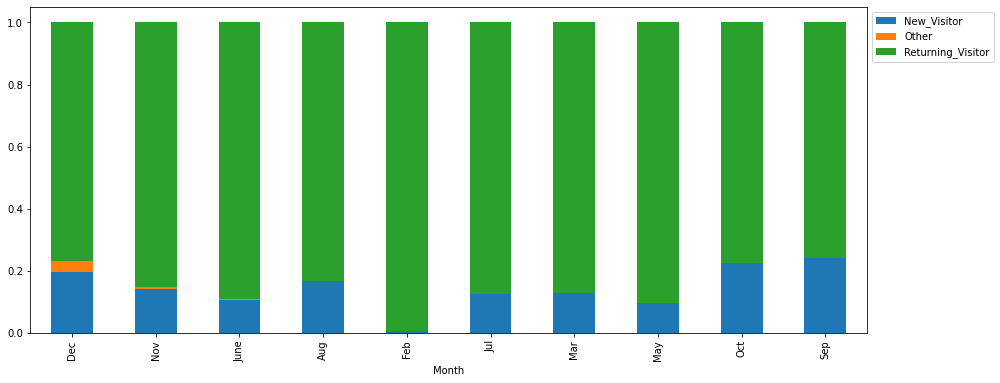

In [32]:
stacked_barplot(data, "Month", "VisitorType")

## Univarient Analysis

In [33]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Administrative_Duration

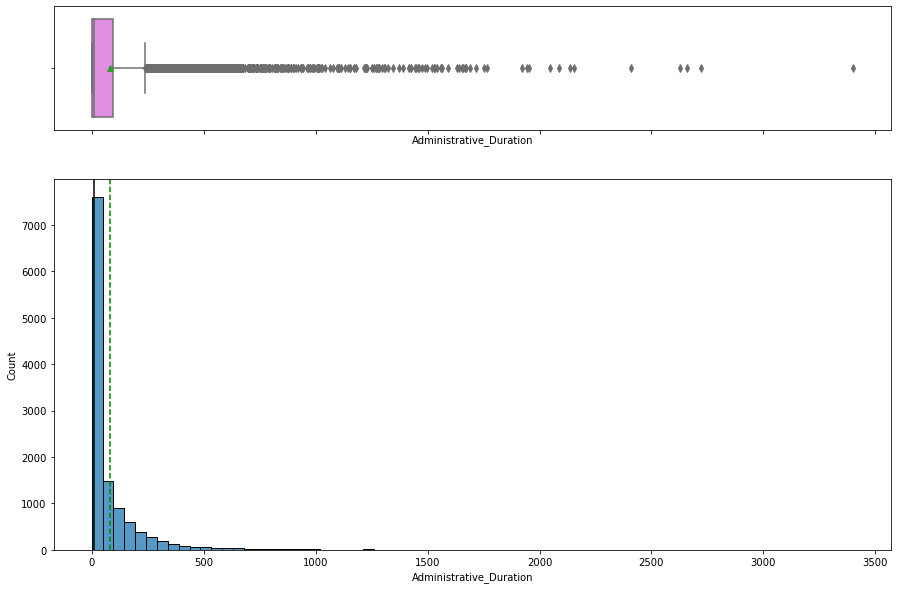

In [34]:
histogram_boxplot(data, "Administrative_Duration", bins=70)

* The distribution of Administrative_Duration is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

### Observations on Informational

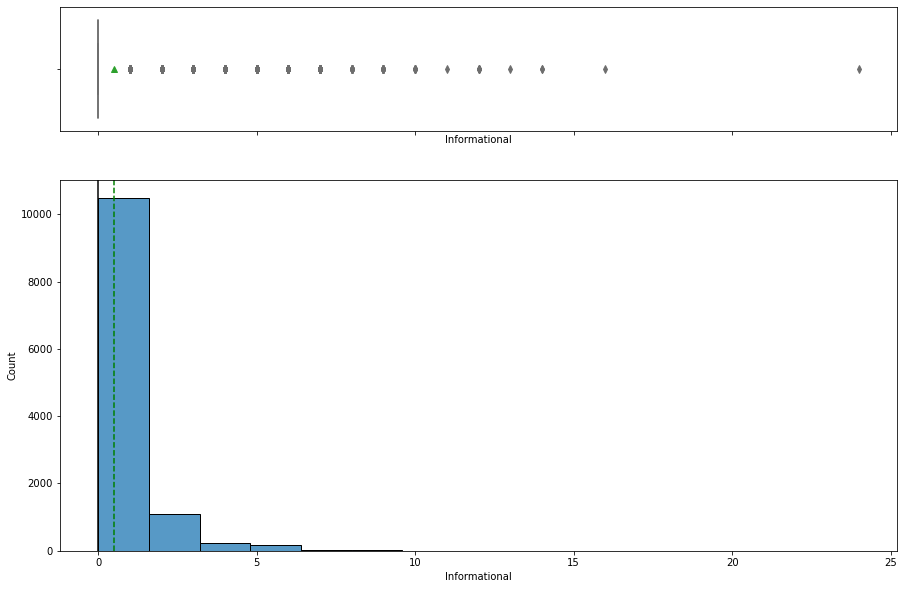

In [35]:
histogram_boxplot(data, "Informational")

* The distribution of Informational is right-skewed.
* There are outliers in this variable.
* Very few customers have visited the informational page.

### Observations on Informational_Duration

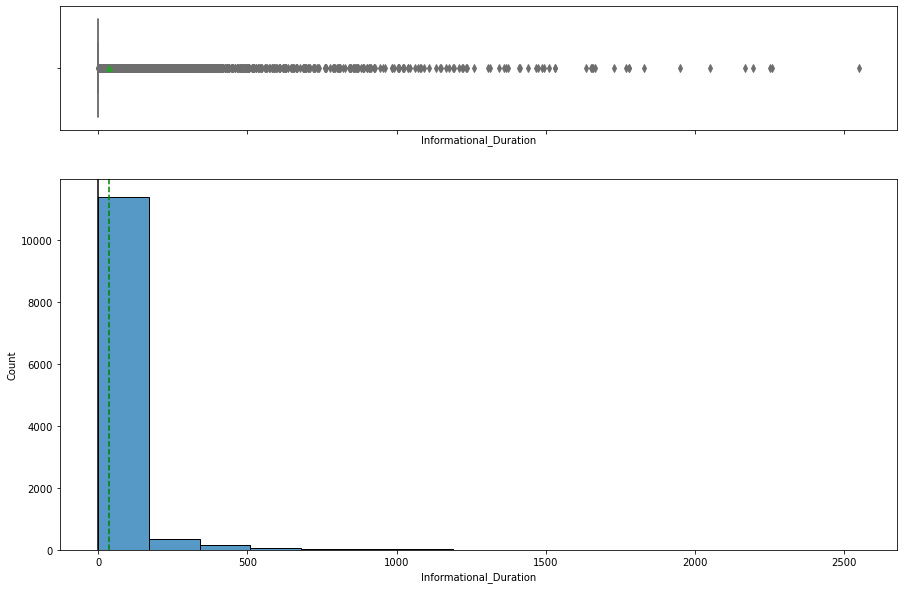

In [36]:
histogram_boxplot(data, "Informational_Duration")

* The distribution of Informational_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 35 seconds on the informational page.

### Observations on ProductRelated

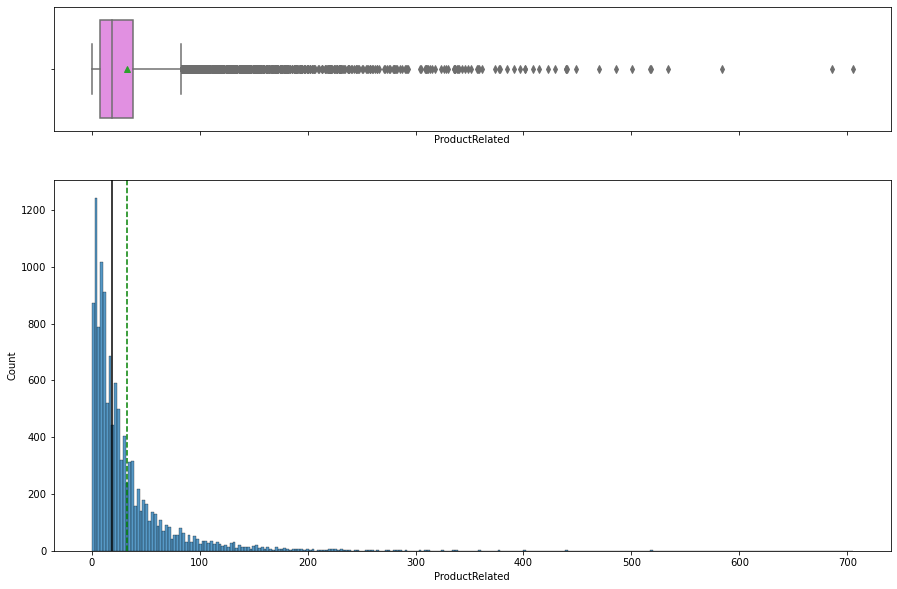

In [37]:
histogram_boxplot(data, "ProductRelated")

* The distribution of ProductRelated is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages.

### Observations on ProductRelated_Duration

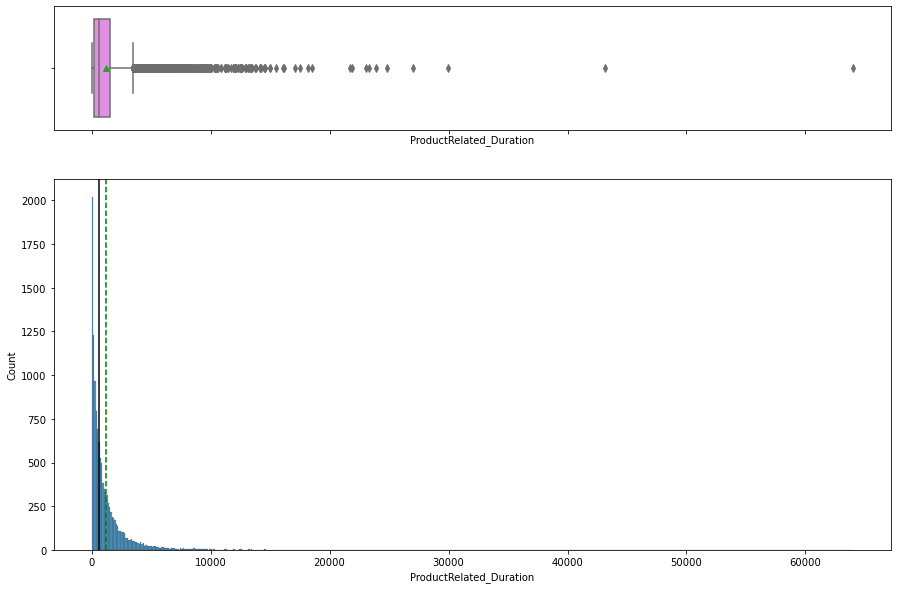

In [38]:
histogram_boxplot(data, "ProductRelated_Duration")

* The distribution of ProductRelated_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.

### Observations on BounceRates

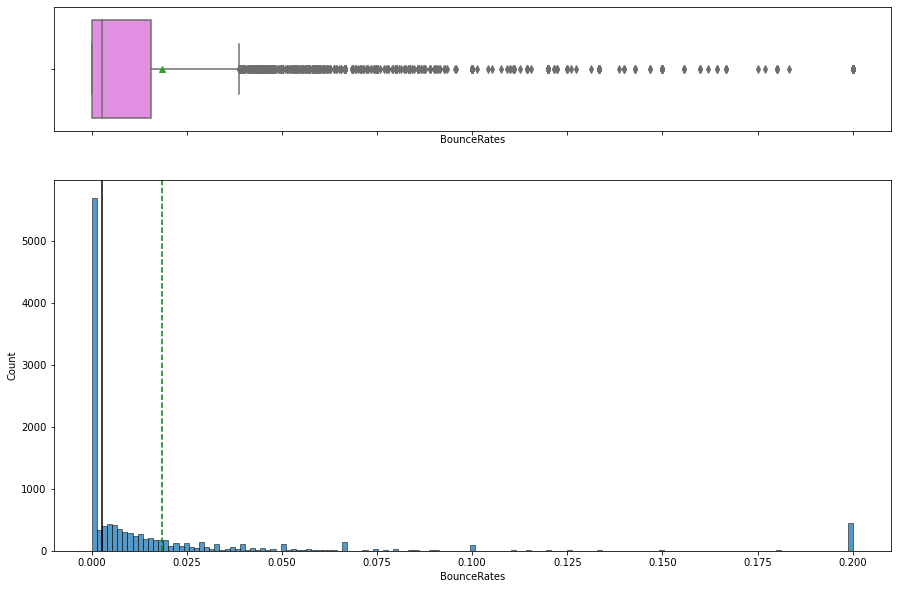

In [39]:
histogram_boxplot(data, "BounceRates")

* The distribution of BounceRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.022.

### Observations on ExitRates

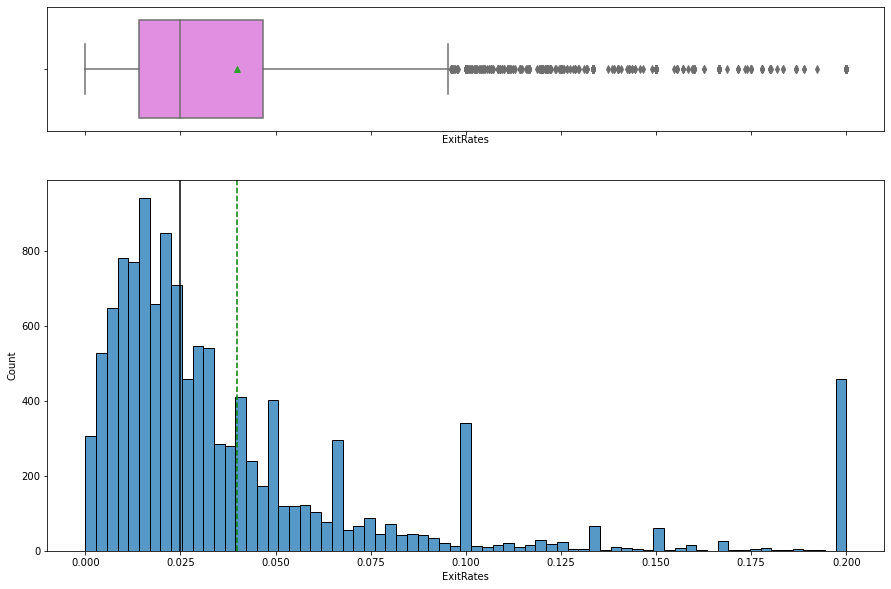

In [40]:
histogram_boxplot(data, "ExitRates")

* The distribution of ExitRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.041.

In [41]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Browser

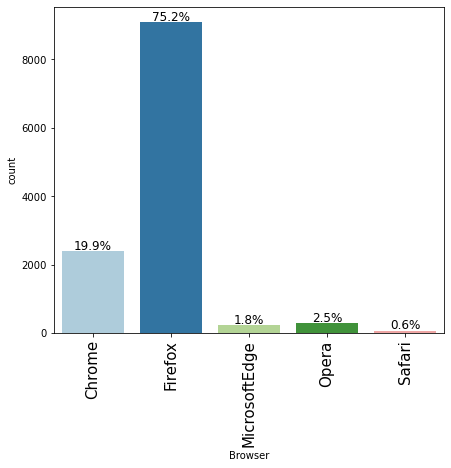

In [42]:
labeled_barplot(data, "Browser", perc=True)

* 75.2% of the users using Firefox browser to access the website followed by Chrome with 19.9% of traffic.

### Observations on Region

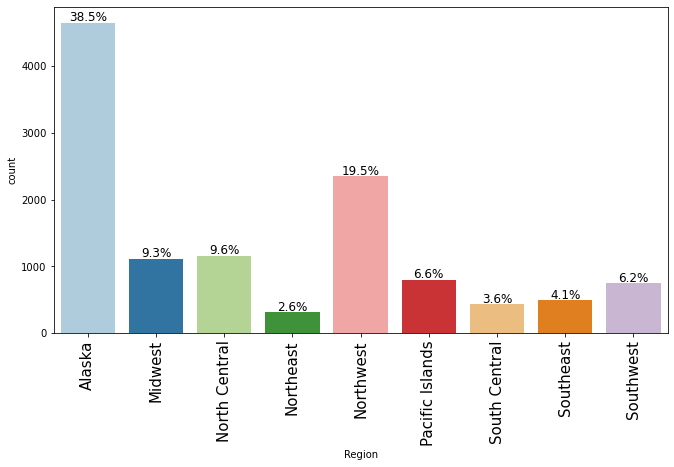

In [43]:
labeled_barplot(data, "Region", perc=True)

* 38.5% of the website sessions are from customers in the Alaska Region.

### Observations on TrafficType

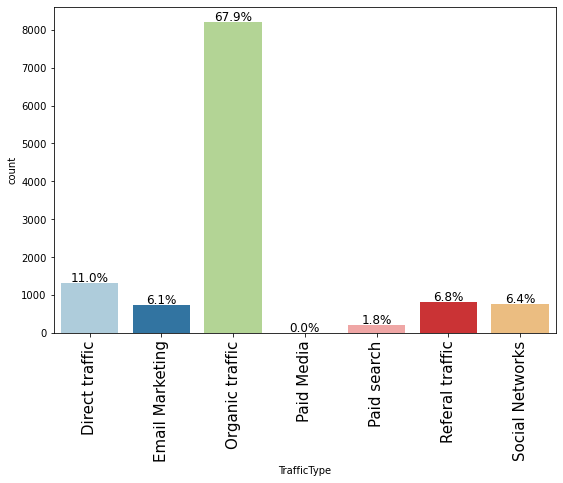

In [44]:
labeled_barplot(data, "TrafficType", perc=True)

* 67.9% of the traffic on website is of Organic traffic

### Observations on Month

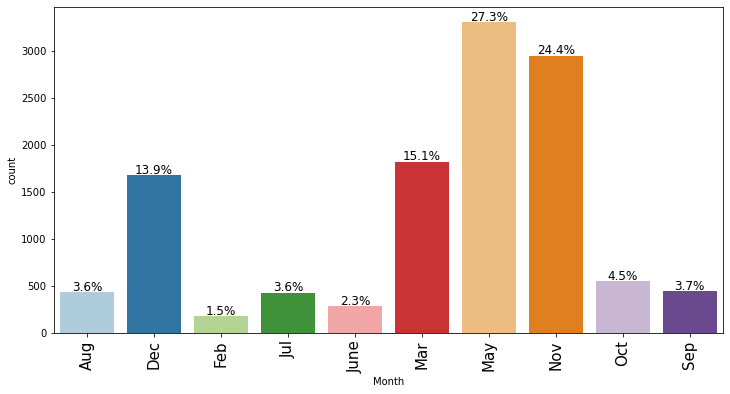

In [45]:
labeled_barplot(data, "Month", perc=True)

* 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic.

### Observations on VisitorType

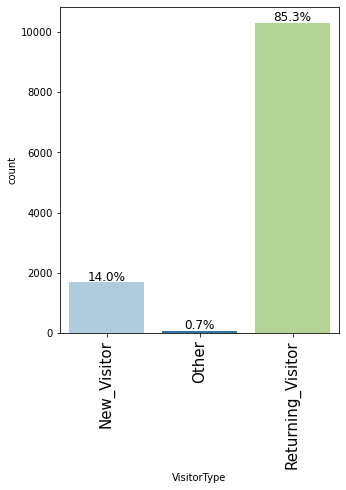

In [46]:
labeled_barplot(data, "VisitorType", perc=True)

* 85.3% of the customer are returning customers, indicating the website has a loyal base of customers.
* During these 10 months website also saw 14% of the customers visiting the website.

### Observations on SpecialDay

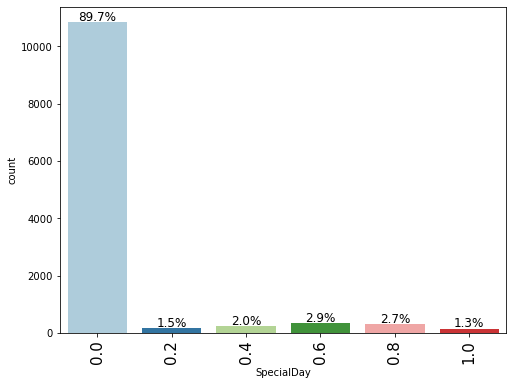

In [47]:
labeled_barplot(data, "SpecialDay", perc=True)

* 89.7% of the website sessions are on Non-Special days.

### Observations on Weekend

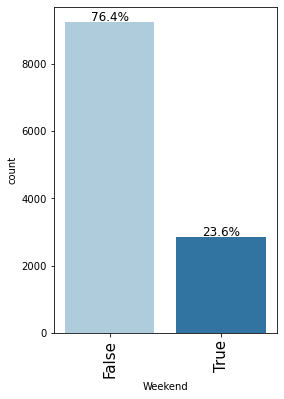

In [48]:
labeled_barplot(data, "Weekend", perc=True)

* 76.4% of the website sessions are on Non-weekend days.

### Observations on Purchase

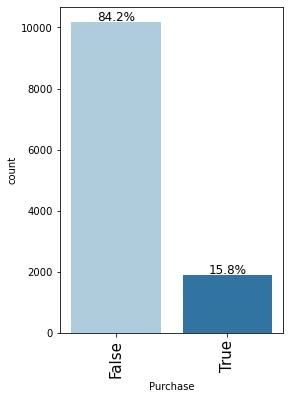

In [49]:
labeled_barplot(data, "Purchase", perc=True)

* Website is able to generate purchase from only 15.8% of the customers.

### Observations on Administrative

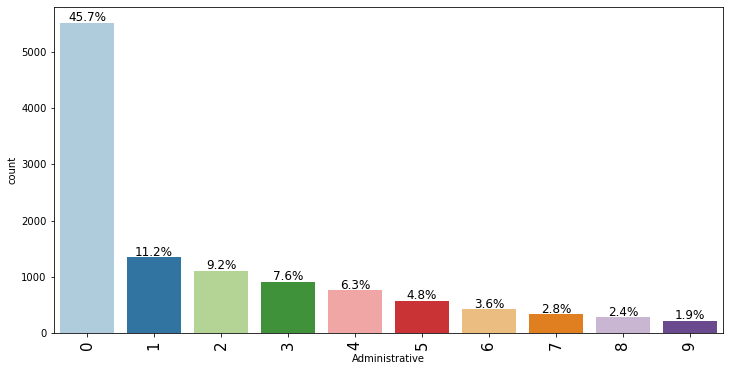

In [50]:
labeled_barplot(data, "Administrative", perc=True, n=10)

* 45.7% of the customers have not visited the administrative page.

### Observations on Informational

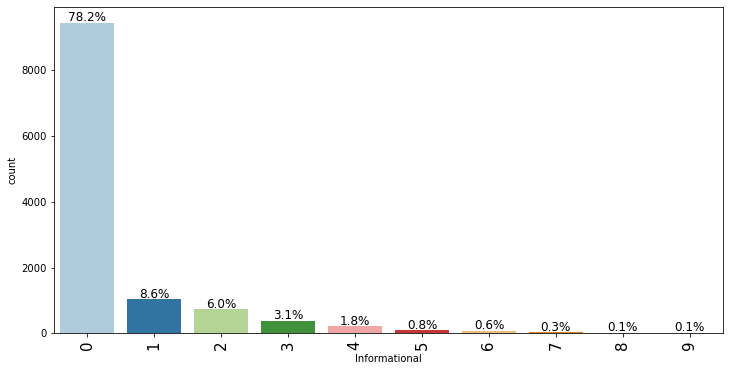

In [51]:
labeled_barplot(data, "Informational", perc=True, n=10)

* 78.2% of the customers have not visited the Informational page.

### Observations on ProductRelated

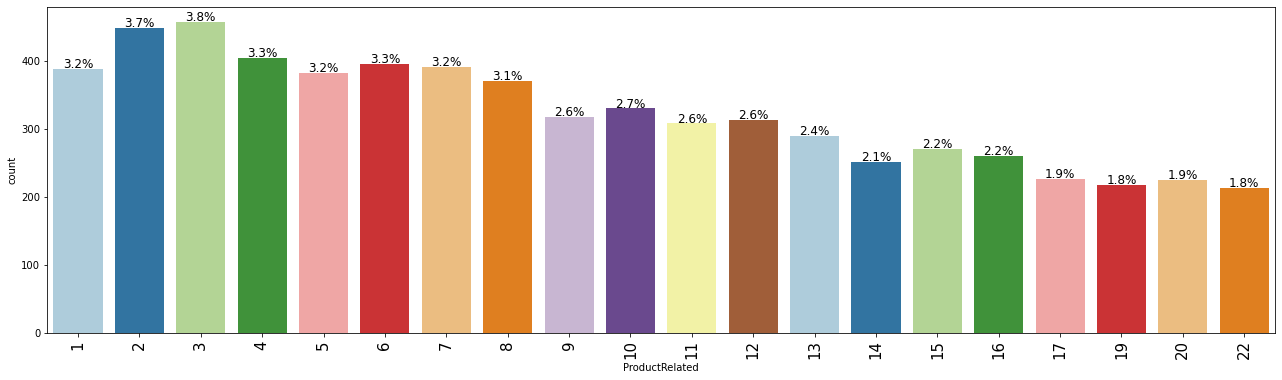

In [52]:
labeled_barplot(data, "ProductRelated", n=20, perc=True)

In [53]:
(len(data[data["ProductRelated"] == 0]["ProductRelated"]) / len(data)) * 100

0.30634210962079816

* Only 0.3% of customers have not visited the product related pages.

## Bivariate Analysis

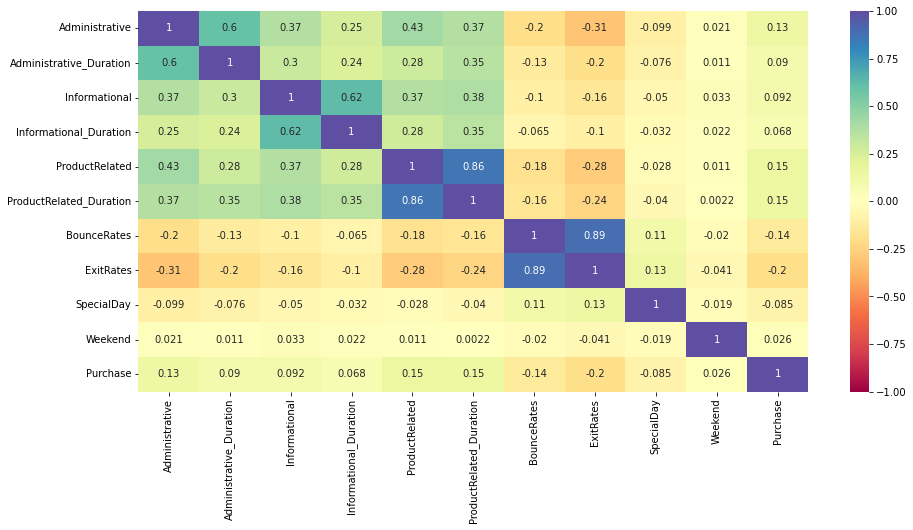

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Administrative, Informational and ProductRelated pages are correlated with the Administrative, Informational and ProductRelated time durations spent on them which is understandable.
* BounceRates and ExitRates are very highly correlated(~0.9) with each other.

In [55]:
# creating dummy varibles 
dummy_data = pd.get_dummies(
    data,
    columns=[
        "Month",
        "VisitorType",
        "Weekend",
        "Region",
        "Browser",
        "TrafficType",
        "SpecialDay",
    ],
    drop_first=True,
)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Purchase,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Region_Midwest,Region_North Central,Region_Northeast,Region_Northwest,Region_Pacific Islands,Region_South Central,Region_Southeast,Region_Southwest,Browser_Firefox,Browser_MicrosoftEdge,Browser_Opera,Browser_Safari,TrafficType_Email Marketing,TrafficType_Organic traffic,TrafficType_Paid Media,TrafficType_Paid search,TrafficType_Referal traffic,TrafficType_Social Networks,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,False,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,False,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split Data

In [56]:
X = dummy_data.drop("Purchase", axis=1)  # Features
y = dummy_data["Purchase"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [57]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(8454, 43) (3624, 43)


In [58]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8454
Number of rows in test data = 3624


In [59]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.841377
1    0.158623
Name: Purchase, dtype: float64
Percentage of classes in test set:
0    0.843543
1    0.156457
Name: Purchase, dtype: float64


### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 15% and the frequency of class B is 85%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.84,1:0.16} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [60]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.84, 1: 0.16}, random_state=1
)

In [61]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.84, 1: 0.16}, random_state=1)

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will contribute to the purchase but in reality the customer would not have contribute to the purchase. - Loss of resources

2. Predicting a customer will not contribute to purchase but in reality the customer would have contributed to purchase. - Loss of opportunity

#### Which case is more important? 

* If we predict a customer who was going to contribute to the purchase as a customer who will not contribute to the purchase.

#### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [62]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    sns.set(rc={'figure.figsize':(6,4)})
    ax = sns.heatmap(cm, annot=labels, fmt="")
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

#### Checking model performance on training set

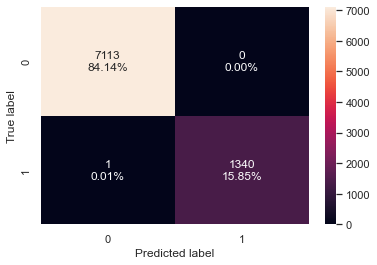

In [64]:
confusion_matrix_sklearn(model, X_train, y_train)

In [65]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9992542878448919


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

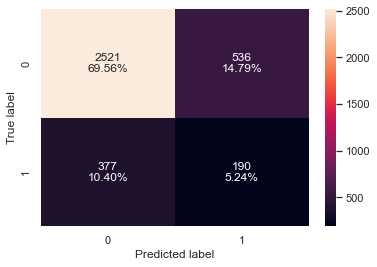

In [66]:
confusion_matrix_sklearn(model, X_test, y_test)

In [67]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.3350970017636684


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### Visualizing the Decision Tree

In [68]:
## creating a list of column names
feature_names = X_train.columns.to_list()

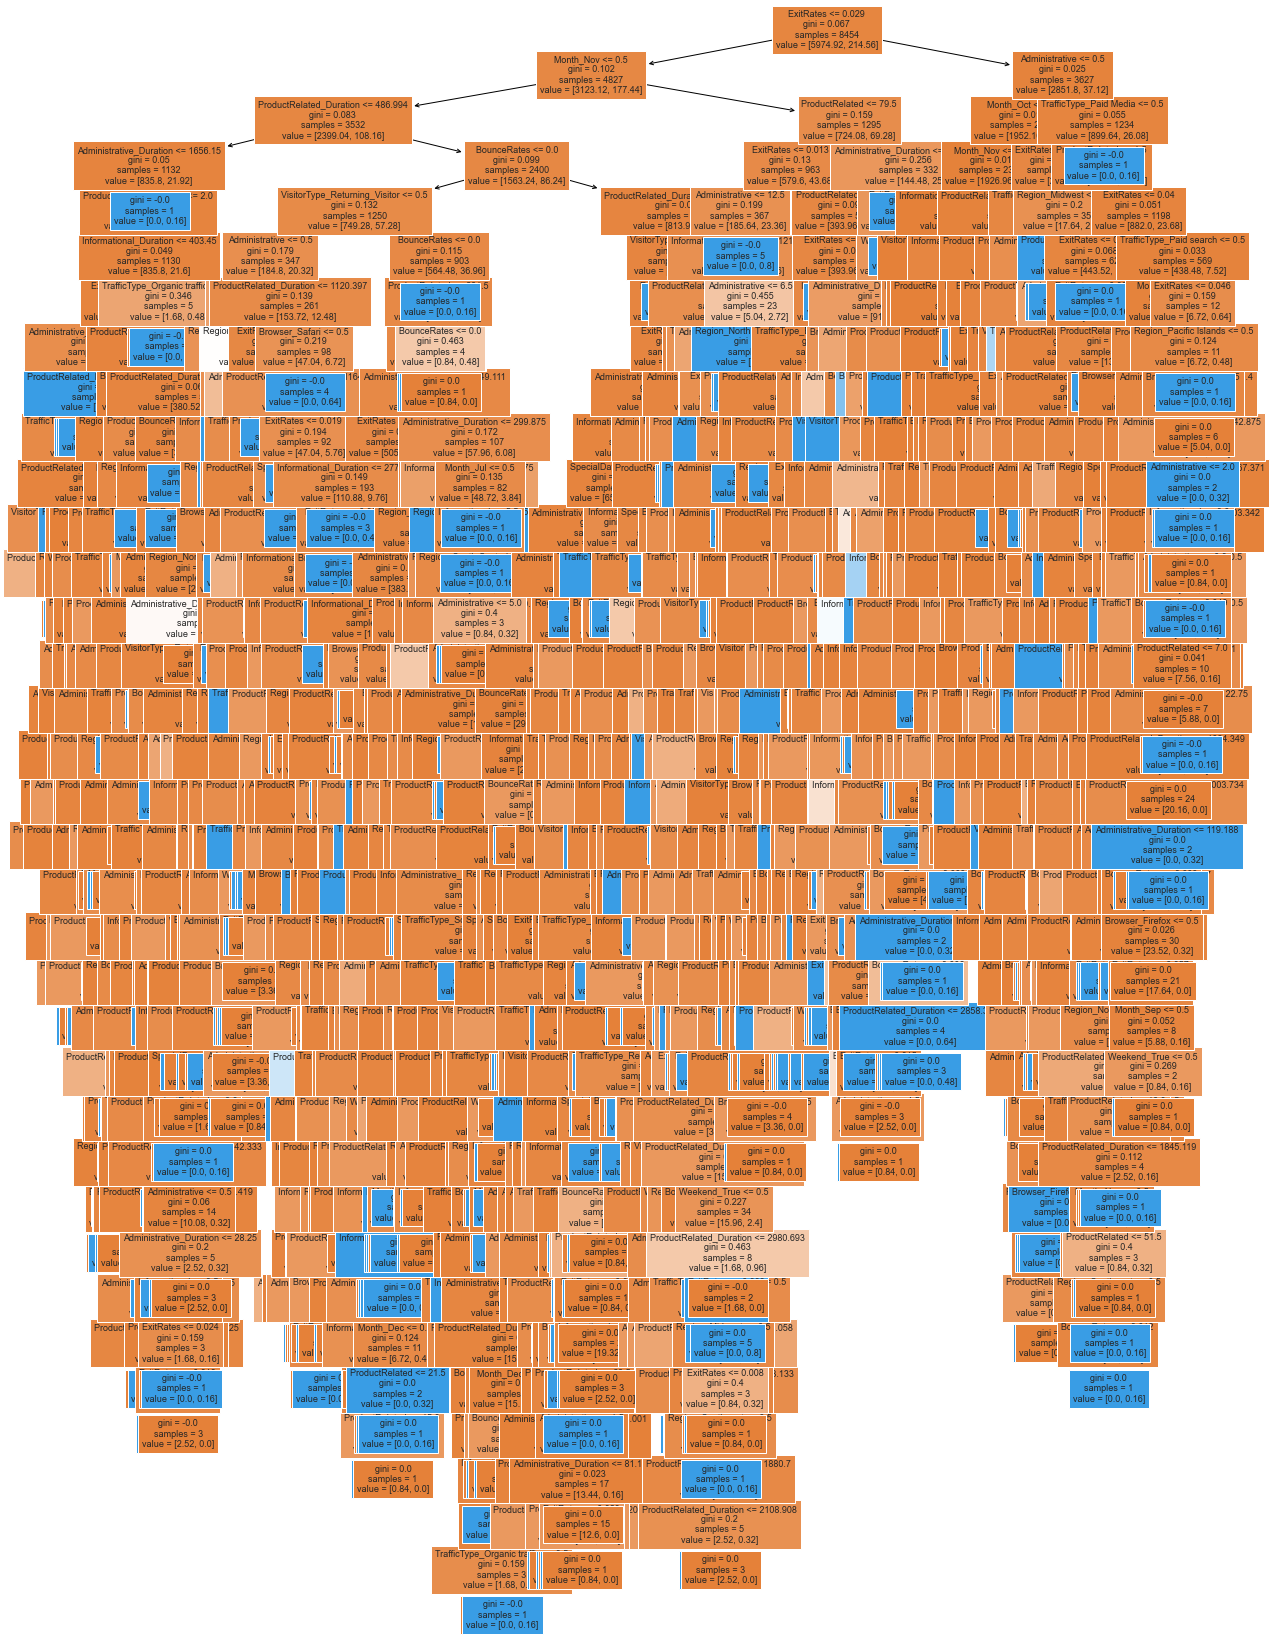

In [69]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing     
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

In [70]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- ExitRates <= 0.03
|   |--- Month_Nov <= 0.50
|   |   |--- ProductRelated_Duration <= 486.99
|   |   |   |--- Administrative_Duration <= 1656.15
|   |   |   |   |--- ProductRelated_Duration <= 2.00
|   |   |   |   |   |--- weights: [0.00, 0.16] class: 1
|   |   |   |   |--- ProductRelated_Duration >  2.00
|   |   |   |   |   |--- Informational_Duration <= 403.45
|   |   |   |   |   |   |--- ExitRates <= 0.00
|   |   |   |   |   |   |   |--- Administrative_Duration <= 125.40
|   |   |   |   |   |   |   |   |--- Administrative <= 4.50
|   |   |   |   |   |   |   |   |   |--- TrafficType_Organic traffic <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Month_Sep <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Month_Sep >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- TrafficType_Organic traffic >  0.50
|   |   |   |   |   |  

* The tree above is very complex and difficult to interpret.

In [71]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

feature_importance = pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
print(feature_importance)

                                        Imp
ProductRelated_Duration        1.672623e-01
ExitRates                      1.484543e-01
Administrative_Duration        1.076753e-01
ProductRelated                 9.344764e-02
BounceRates                    8.617003e-02
Administrative                 6.180695e-02
Informational_Duration         4.853888e-02
Informational                  2.549098e-02
Browser_Firefox                1.963494e-02
Weekend_True                   1.793097e-02
Region_Southwest               1.552242e-02
Region_Northwest               1.537737e-02
Region_North Central           1.384384e-02
Region_Midwest                 1.313559e-02
Month_May                      1.266458e-02
TrafficType_Organic traffic    1.213751e-02
TrafficType_Referal traffic    1.153772e-02
Month_Dec                      9.290587e-03
VisitorType_Returning_Visitor  8.568400e-03
TrafficType_Email Marketing    7.883099e-03
Month_Oct                      7.510191e-03
Region_Pacific Islands         7

Text(0.5, 0, 'Relative Importance')

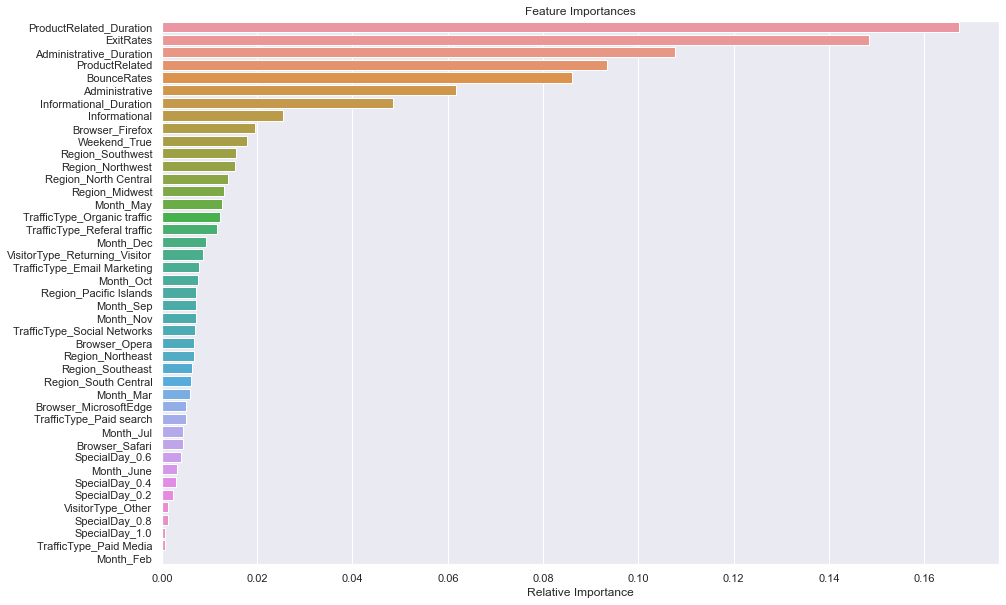

In [72]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

* According to the decision tree model, ProductRelated_Duration is the most important variable followed by ExitRates for predicting the Purchase.

## Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [73]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.84, 1: 0.16})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.84, 1: 0.16}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1,
                       splitter='random')

#### Checking performance on training set

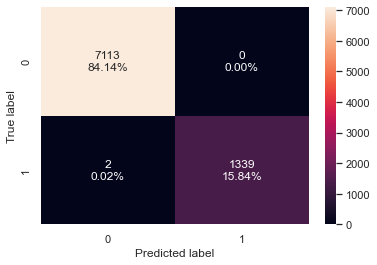

In [74]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [75]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9985085756897838


#### Checking performance on test set

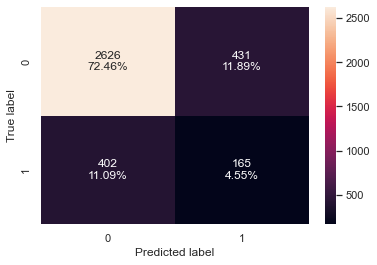

In [76]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [77]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.291005291005291


### Visualizing the Decision Tree

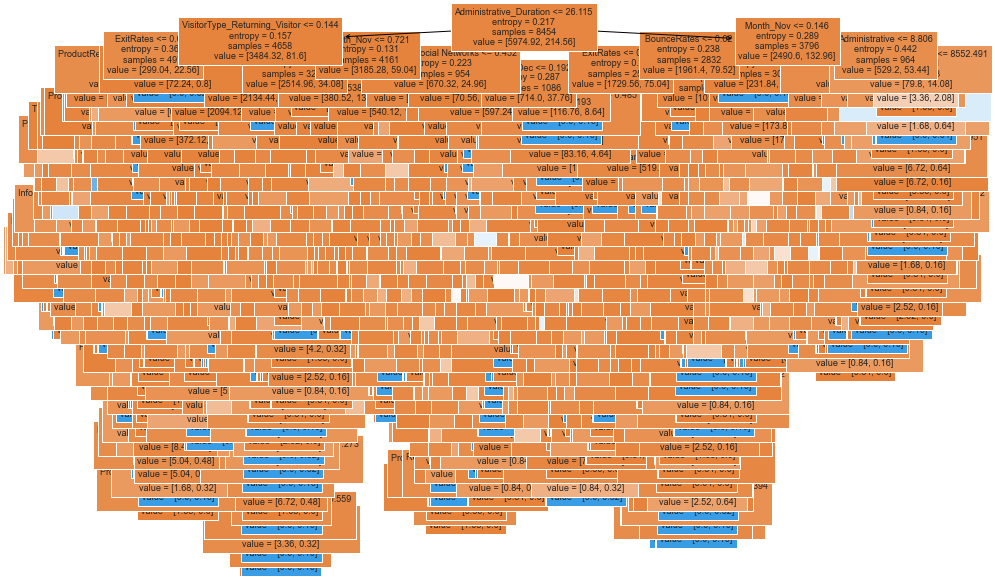

In [78]:
sns.set(rc={'figure.figsize':(15,10)})
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

In [79]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Administrative_Duration <= 26.12
|   |--- VisitorType_Returning_Visitor <= 0.14
|   |   |--- ExitRates <= 0.05
|   |   |   |--- ProductRelated_Duration <= 514.82
|   |   |   |   |--- Month_Dec <= 0.29
|   |   |   |   |   |--- Month_Nov <= 0.77
|   |   |   |   |   |   |--- Region_Northwest <= 0.82
|   |   |   |   |   |   |   |--- Month_Jul <= 0.01
|   |   |   |   |   |   |   |   |--- ProductRelated_Duration <= 483.15
|   |   |   |   |   |   |   |   |   |--- BounceRates <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- Browser_Firefox <= 0.91
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Browser_Firefox >  0.91
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- BounceRates >  0.00
|   |   |   |   |   |   |   |   |   |   |--- ProductRelated <= 6.52
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.32] class: 1
|   |   |   

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer lands on a page with exit rate less than 0.04 and spends less than 486 seconds on the product related page and the month is not May, March or February then the customer will be contributing to the purchase. But if the month is December then the customer will not contribute to the purchase.

`Interpretations from other decision rules can be made similarly`

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )


feature_importance = pd.DataFrame(
    estimator.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

print(feature_importance)

# Here we will see that importance of features has increased

                                    Imp
ExitRates                      0.115832
ProductRelated_Duration        0.104480
ProductRelated                 0.095643
Administrative_Duration        0.088271
BounceRates                    0.062078
Administrative                 0.061962
Informational_Duration         0.032573
Informational                  0.032093
Browser_Firefox                0.030422
Region_Northwest               0.028481
Weekend_True                   0.028284
VisitorType_Returning_Visitor  0.027837
TrafficType_Organic traffic    0.026640
Region_Midwest                 0.022277
Region_North Central           0.021235
Month_Nov                      0.020697
Region_Southwest               0.018318
Month_May                      0.013454
Region_South Central           0.012594
Month_Oct                      0.012540
TrafficType_Referal traffic    0.012479
Region_Pacific Islands         0.011683
Month_Mar                      0.011497
Month_Dec                      0.011232


Text(0.5, 0, 'Relative Importance')

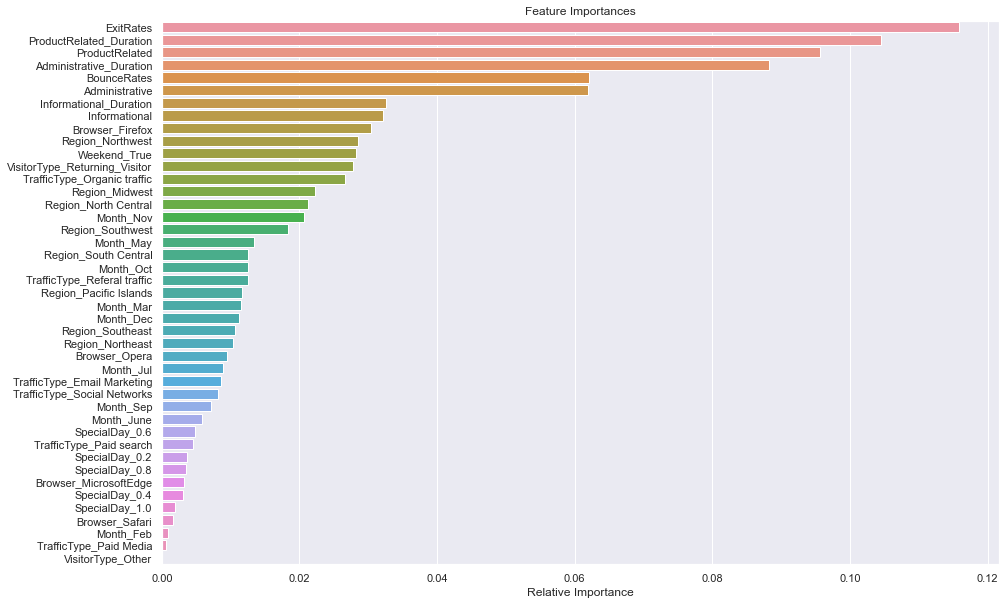

In [81]:
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

* In tuned decision tree ExitRates is the most important feature followed by ProductRelated_Duration

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [82]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.84, 1: 0.16})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [83]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.000043
1,2.295969e-20,0.000043
2,2.295969e-20,0.000043
3,2.295969e-20,0.000043
4,2.869961e-20,0.000043
...,...,...
464,1.850299e-04,0.063981
465,2.076391e-04,0.065434
466,2.793500e-04,0.065714
467,3.801876e-04,0.066094


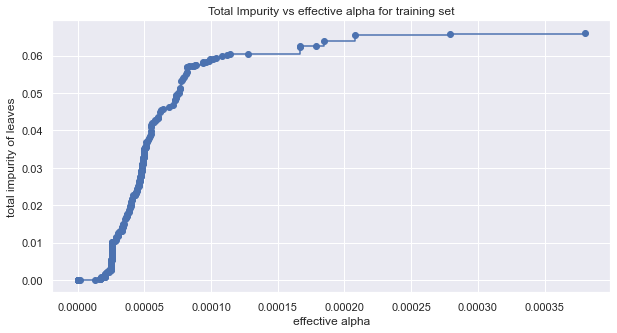

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [85]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 93 with ccp_alpha: 0.0008331730813097155



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

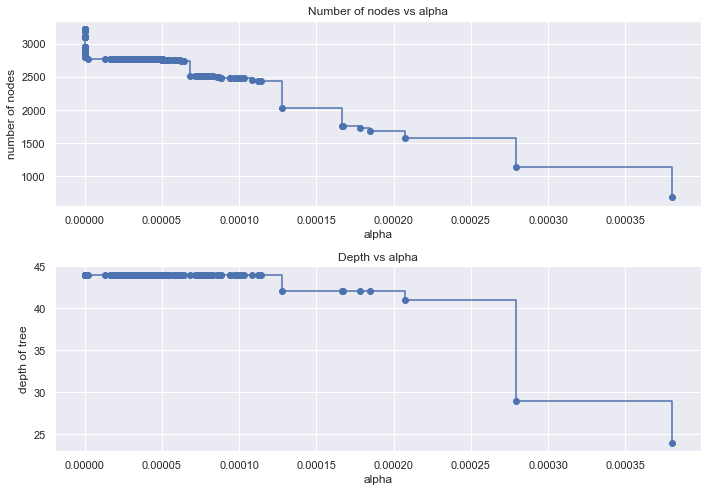

In [86]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [87]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [88]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [89]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

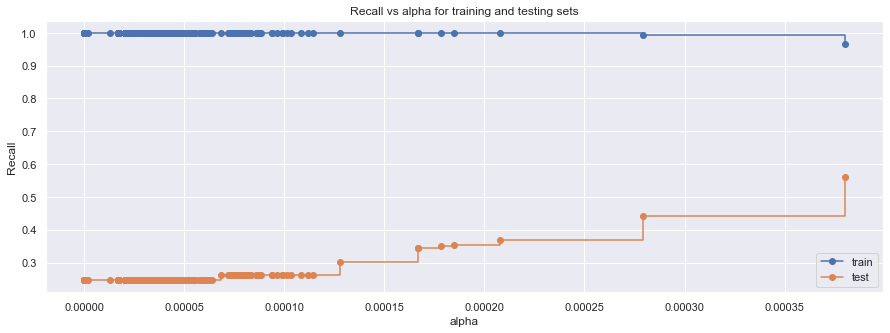

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.016 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [91]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00038018760229853454,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [92]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00038018760229853454,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### checking performance on training set

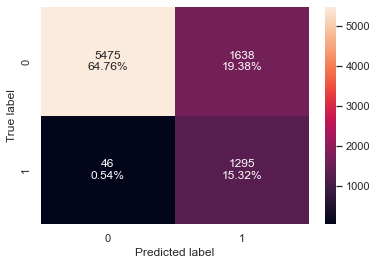

In [93]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [94]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9656972408650261


#### checking performance on test set

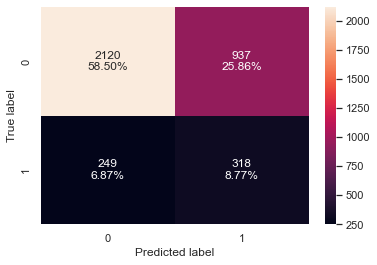

In [95]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [96]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.5608465608465608


### Visualizing the Decision Tree

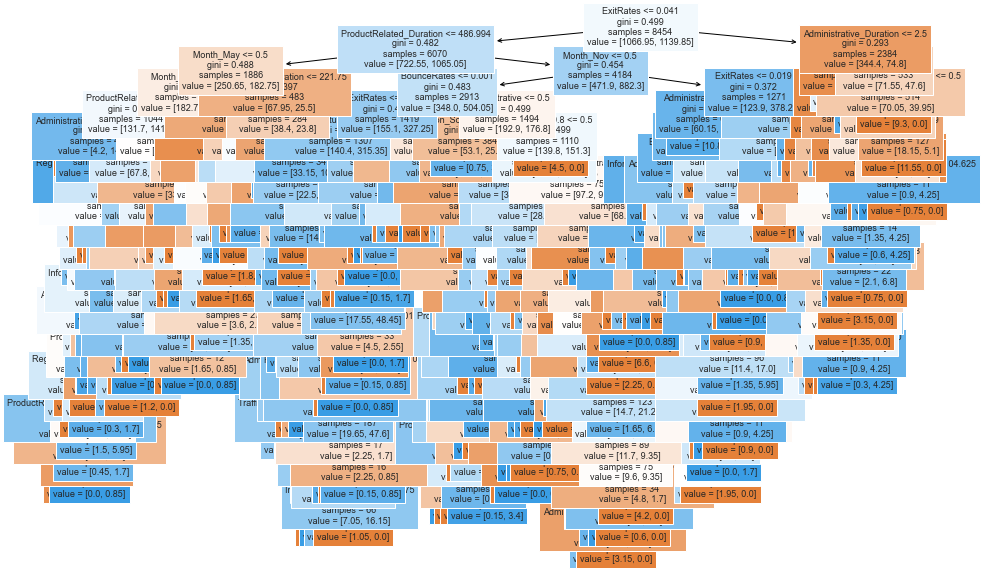

In [97]:
sns.set(rc={'figure.figsize':(15,10)})

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [98]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.84, 1: 0.16}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.84, 1: 0.16},
                       random_state=1)

In [99]:
predict_best_model = best_model2.predict(X_test)

#### Checking performance on the training set

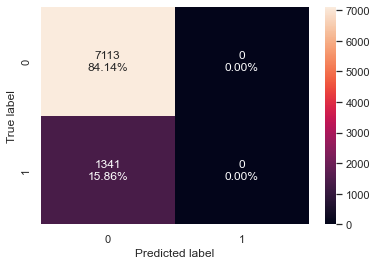

In [100]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [101]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.0


#### Checking performance on the test set

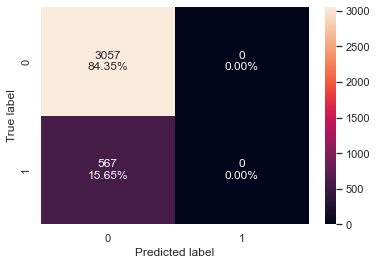

In [102]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [103]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.0


* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

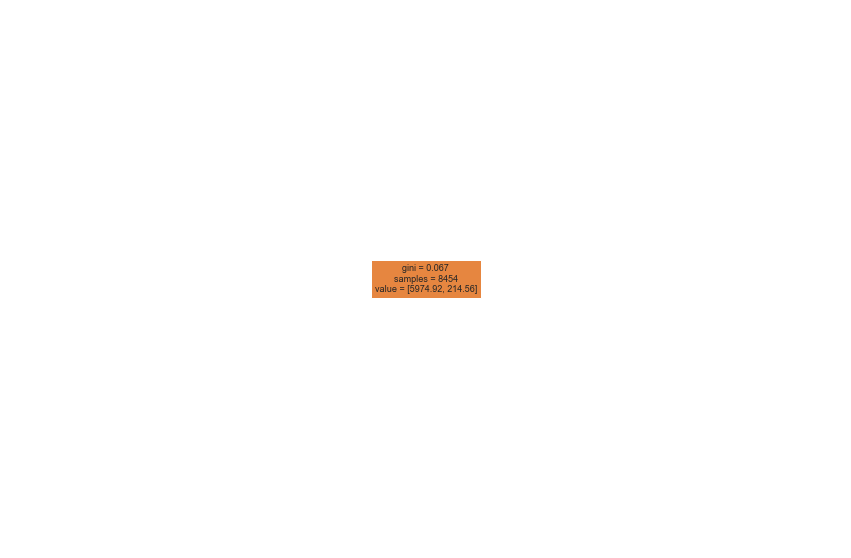

In [104]:
sns.set(rc={'figure.figsize':(15,10)})

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

In [105]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- weights: [5974.92, 214.56] class: 0



In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

feature_importance = pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)

print(feature_importance)

                               Imp
Administrative                 0.0
TrafficType_Email Marketing    0.0
Region_Pacific Islands         0.0
Region_South Central           0.0
Region_Southeast               0.0
Region_Southwest               0.0
Browser_Firefox                0.0
Browser_MicrosoftEdge          0.0
Browser_Opera                  0.0
Browser_Safari                 0.0
TrafficType_Organic traffic    0.0
Region_Northeast               0.0
TrafficType_Paid Media         0.0
TrafficType_Paid search        0.0
TrafficType_Referal traffic    0.0
TrafficType_Social Networks    0.0
SpecialDay_0.2                 0.0
SpecialDay_0.4                 0.0
SpecialDay_0.6                 0.0
SpecialDay_0.8                 0.0
Region_Northwest               0.0
Region_North Central           0.0
Administrative_Duration        0.0
Month_Jul                      0.0
Informational                  0.0
Informational_Duration         0.0
ProductRelated                 0.0
ProductRelated_Durat

Text(0.5, 0, 'Relative Importance')

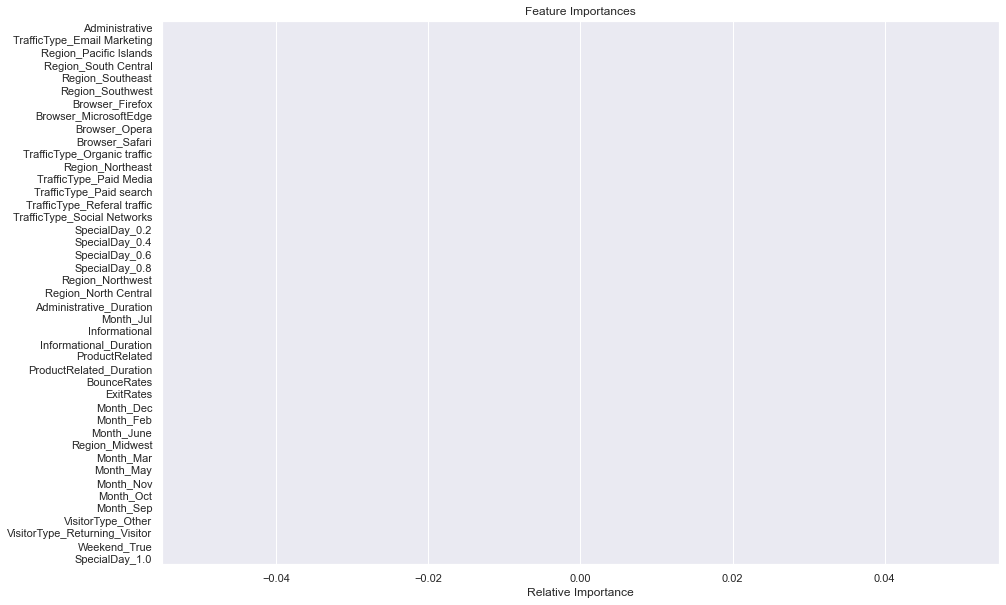

In [107]:
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

* Exit rates and ProductRelated duration are the top two important features to predict customer sessions contributing to Purchase.

## Comparing all the decision tree models

In [108]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,0.999254
1,0.998509
2,0.000000


In [109]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.335097
1,0.291005
2,0.000000


* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Conclusions

- We analyzed the "Online Shoppers Purchasing Intention" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to contribute to Purchase generation (by purchasing) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- ExitRates, ProductRelated_Duration, Month_Nov and BounceRates are the most important variable in predicting the customers that will contribute to the Purchase. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations

* According to the decision tree model - 

    a) If a customer lands on a page with an exit rate greater than 0.041 there's a very high chance the customer will not be contributing to the Purchase.

    b) If a customer lands on a page with an exit rate less than 0.041 and spends more than ~5 minutes on a product related page then there is a very high chance that the customer is going to buy something and contribute to the Purchase.


* It is observed that the more time the customers spend on Administrative, Informational and ProductRelated pages more is the likelihood of them contributing to the Purchase. Although the website can not control the time spent by customers it can enhance the user experience on the website to engage them more on the website.

* Browsing Customers - Employ the predictive model to predict potential customers (customers who can buy the product), Offer limited-time coupons/discounts on a real-time basis only to those customers. This can also be employed for the customers in months like March, May, November, and December, as in those months, the traffic is higher so these months have potential buying users.

* It is observed that most of the traffic that the website sees is on the non-special days, While there is little to none traffic and Purchase sessions on special days - the website should initiate schemes/offers on the special days to attract more customers on such days.

* May and November were the months where the website saw the highest traffic with further data it should be investigated what portfolios were running in those months and an inspiration to create more such portfolios can be drawn and implemented.

* Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

* Better resource management - Regular days (Non-weekend) days is when the website sees the most traffic, resources such as customer care services can be allocated more for these days.

* Website should be made more friendly, easily accessible, and feasible for other operating systems and browsers as new visitors seem to struggle with administrative pages.

* Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design for more browsers and operating systems.